In [2]:
import pandas as pd
df = pd.read_csv("telco_churn_5000.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST00000,Male,0,Yes,No,54,Yes,No,DSL,No internet service,...,Yes,No,Yes,Yes,Two year,No,Bank transfer,97.51,5255.62,No
1,CUST00001,Female,0,No,No,35,No,No phone service,No,No,...,No,Yes,No internet service,No internet service,Month-to-month,No,Credit card,91.67,3215.59,No
2,CUST00002,Male,0,Yes,No,36,Yes,No,No,No,...,No internet service,Yes,Yes,No,Month-to-month,No,Credit card,60.29,2151.65,No
3,CUST00003,Male,0,No,Yes,13,No,Yes,Fiber optic,Yes,...,No internet service,Yes,No internet service,Yes,Two year,No,Bank transfer,90.93,1193.09,No
4,CUST00004,Male,1,No,Yes,26,Yes,No phone service,DSL,Yes,...,No,No internet service,Yes,No,One year,Yes,Electronic check,82.30,2147.72,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   object 
 1   gender            5000 non-null   object 
 2   SeniorCitizen     5000 non-null   int64  
 3   Partner           5000 non-null   object 
 4   Dependents        5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   PhoneService      5000 non-null   object 
 7   MultipleLines     5000 non-null   object 
 8   InternetService   5000 non-null   object 
 9   OnlineSecurity    5000 non-null   object 
 10  OnlineBackup      5000 non-null   object 
 11  DeviceProtection  5000 non-null   object 
 12  TechSupport       5000 non-null   object 
 13  StreamingTV       5000 non-null   object 
 14  StreamingMovies   5000 non-null   object 
 15  Contract          5000 non-null   object 
 16  PaperlessBilling  5000 non-null   object 


In [4]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.498200,35.357800,70.536462,2497.084802
std,0.500047,20.670618,28.804629,1882.021707
min,0.000000,0.000000,20.010000,-19.910000
25%,0.000000,17.000000,45.697500,980.100000
50%,0.000000,35.000000,70.675000,2034.155000
75%,1.000000,53.000000,95.862500,3729.917500
max,1.000000,71.000000,119.950000,8396.440000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.nunique()

customerID          5000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      3950
TotalCharges        4973
Churn                  2
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [8]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip()


In [9]:
df = df.drop_duplicates()


In [11]:
df.to_csv("cleaned_telco_churn_5000.csv", index=False)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_telco_churn_5000.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST00000,Male,0,Yes,No,54,Yes,No,DSL,No internet service,...,Yes,No,Yes,Yes,Two year,No,Bank transfer,97.51,5255.62,No
1,CUST00001,Female,0,No,No,35,No,No phone service,No,No,...,No,Yes,No internet service,No internet service,Month-to-month,No,Credit card,91.67,3215.59,No
2,CUST00002,Male,0,Yes,No,36,Yes,No,No,No,...,No internet service,Yes,Yes,No,Month-to-month,No,Credit card,60.29,2151.65,No
3,CUST00003,Male,0,No,Yes,13,No,Yes,Fiber optic,Yes,...,No internet service,Yes,No internet service,Yes,Two year,No,Bank transfer,90.93,1193.09,No
4,CUST00004,Male,1,No,Yes,26,Yes,No phone service,DSL,Yes,...,No,No internet service,Yes,No,One year,Yes,Electronic check,82.30,2147.72,No


In [2]:
df['Churn'].value_counts()


Churn
No     3675
Yes    1325
Name: count, dtype: int64

In [3]:
(df['Churn'].value_counts(normalize=True) * 100).round(2)


Churn
No     73.5
Yes    26.5
Name: proportion, dtype: float64

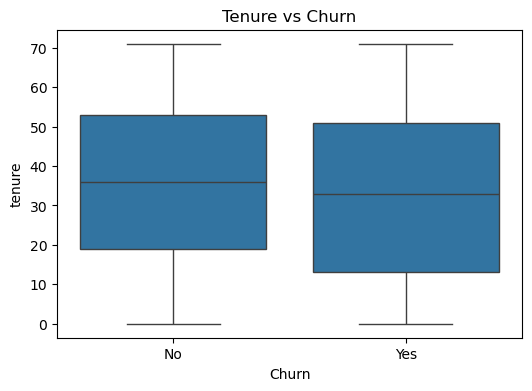

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


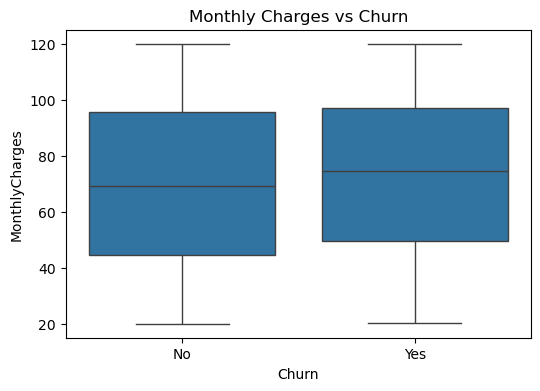

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


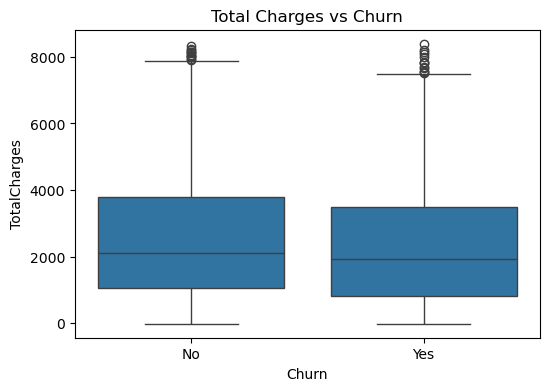

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


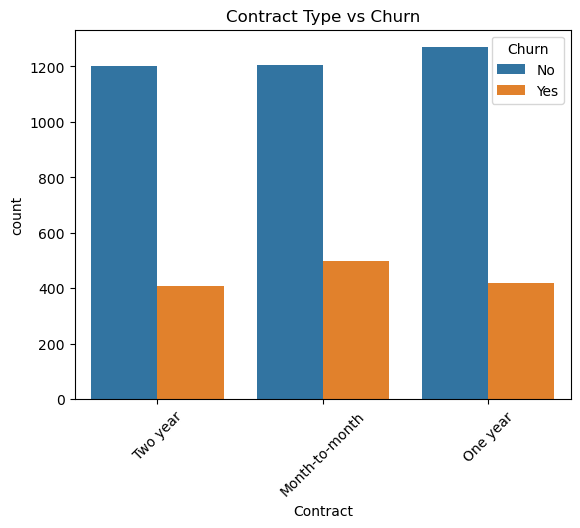

In [7]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Contract Type vs Churn")
plt.show()


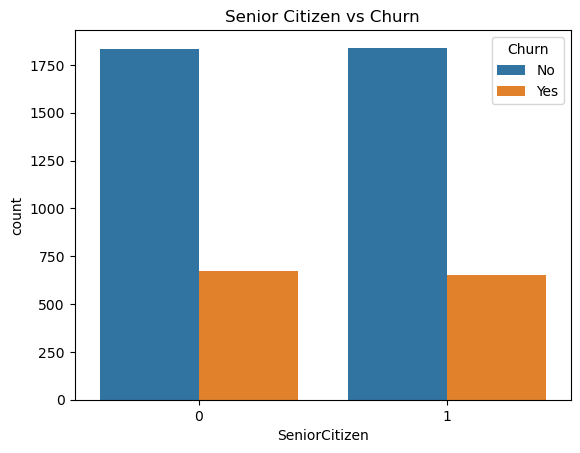

In [8]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizen vs Churn")
plt.show()


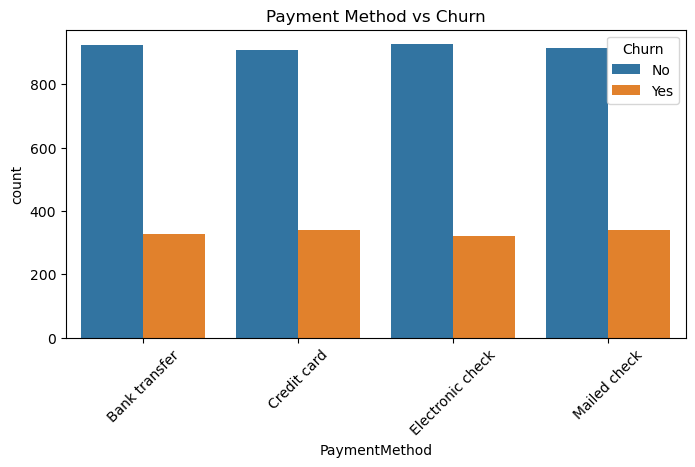

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


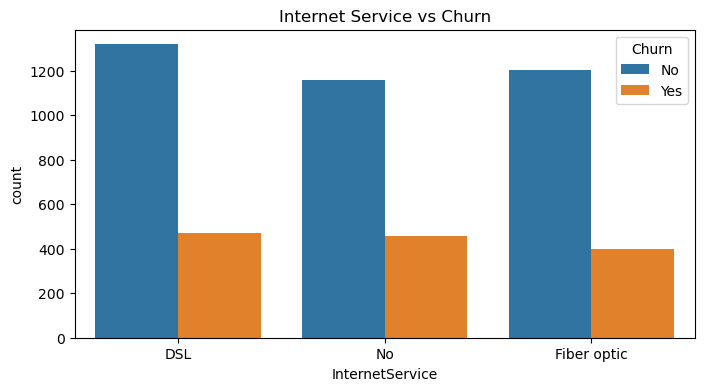

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()


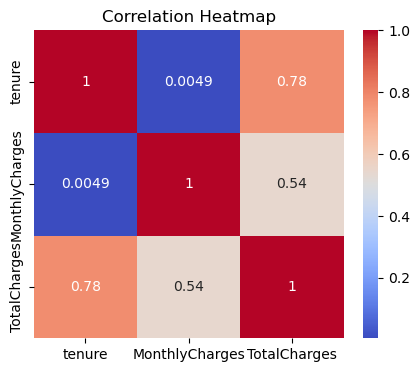

In [11]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
